Model: Random Forest Regressor
Mean Squared Error (MSE): 1232.1112
Mean Absolute Error (MAE): 18.7000
R-squared (R²): 0.8465
Root Mean Squared Error (RMSE): 35.1014




<ipython-input-2-493cdb920824>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


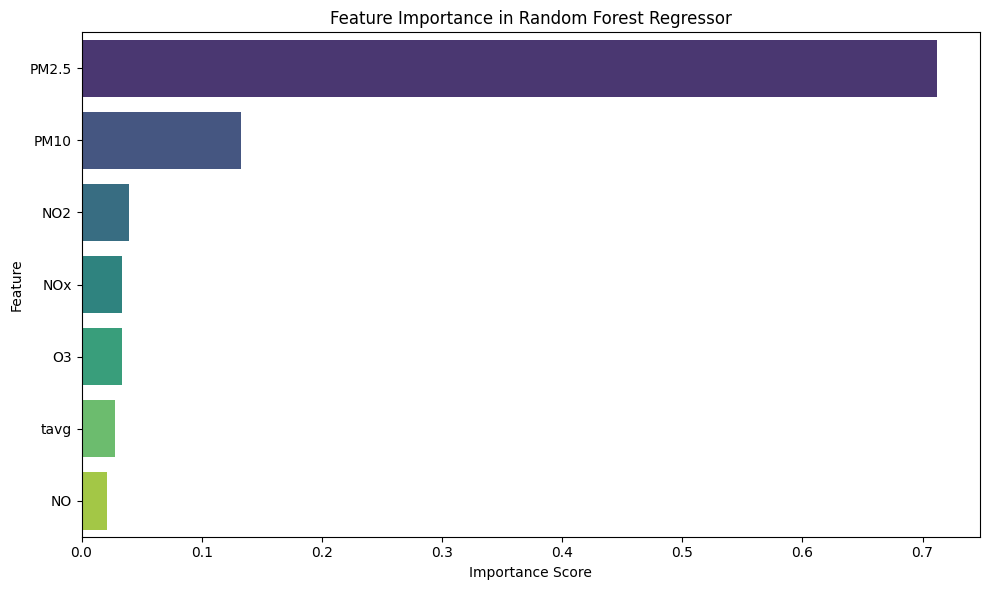

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/sample_data/result-p.csv")  # Replace with your file path

# Data Preprocessing

# 1. Fill missing values with the mean of each column
data_cleaned = data.fillna(data.mean())

# 2. Define features (X) and target (y)
X = data_cleaned[['PM2.5', 'NO2', 'PM10', 'NO', 'NOx', 'O3', 'tavg']]  # Features
y = data_cleaned['AQI']  # Target variable

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100)
rf_regressor.fit(X_train_scaled, y_train)

# 6. Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_scaled)

# 7. Function to calculate and display metrics
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("\n")

# 8. Evaluate the Random Forest model
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

# 9. Feature Importance Calculation
feature_importances = rf_regressor.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 10. Visualization of Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
